In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the dataset

In [22]:
df=pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
df["Species"]=pd.get_dummies(df["Species"])

In [11]:
df["Species"].unique()

array([1, 0], dtype=uint8)

Optimal Value of K for K mean clusters

In [13]:
from sklearn.cluster import KMeans
error=[]
num=range(1,12)
for i in range(1,12):
    model=KMeans(i)
    model.fit(df)
    error.append(model.inertia_)
wcss=pd.DataFrame({"clusterno":num,"wcss":error})
wcss
#within sum of squares - wcss

C:\Users\HF4\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,clusterno,wcss
0,1,281951.657733
1,2,70632.965600
2,3,31366.569671
3,4,17785.341131
4,5,11447.478620
5,6,7904.702871
6,7,5919.663183
7,8,4573.091693
8,9,3577.418842
9,10,2986.991776


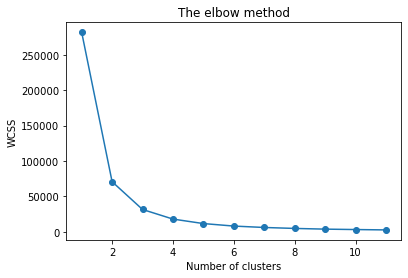

In [15]:
plt.plot(wcss["clusterno"],wcss["wcss"],marker="o")
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()
#optimal no of clusters is 3

K means Model Building

In [27]:
model=KMeans(n_clusters=3)
labels=model.fit_predict(df)
dfcluster=df.copy()
dfcluster["labels"]=labels
dfcluster.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,labels
0,1,5.1,3.5,1.4,0.2,1,0
1,2,4.9,3.0,1.4,0.2,1,0
2,3,4.7,3.2,1.3,0.2,1,0
3,4,4.6,3.1,1.5,0.2,1,0
4,5,5.0,3.6,1.4,0.2,1,0


In [29]:
dfcluster["labels"].value_counts()
#no of values in each cluster

2    50
1    50
0    50
Name: labels, dtype: int64

Different values in different cluster is been compared 

C:\Users\HF4\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

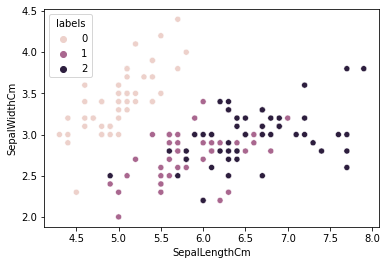

In [31]:
sns.scatterplot(dfcluster["SepalLengthCm"],dfcluster["SepalWidthCm"],hue=dfcluster["labels"])

C:\Users\HF4\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalWidthCm'>

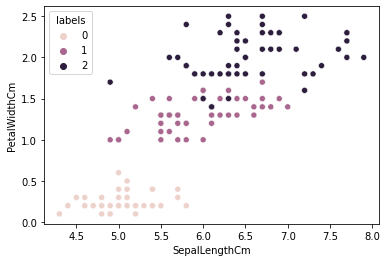

In [33]:
sns.scatterplot(dfcluster["SepalLengthCm"],dfcluster["PetalWidthCm"],hue=dfcluster["labels"])

C:\Users\HF4\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalWidthCm'>

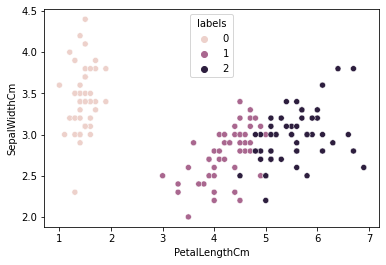

In [34]:
sns.scatterplot(dfcluster["PetalLengthCm"],dfcluster["SepalWidthCm"],hue=dfcluster["labels"])

C:\Users\HF4\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PetalWidthCm', ylabel='SepalWidthCm'>

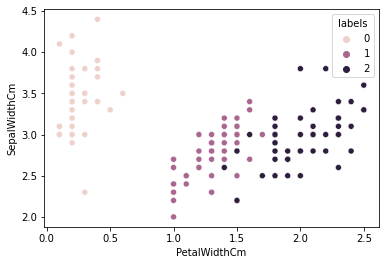

In [35]:
sns.scatterplot(dfcluster["PetalWidthCm"],dfcluster["SepalWidthCm"],hue=dfcluster["labels"])

C:\Users\HF4\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalWidthCm'>

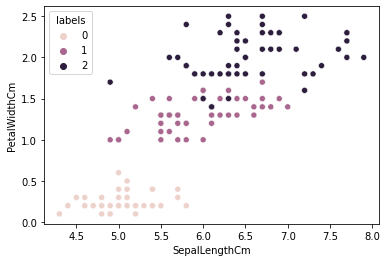

In [36]:
sns.scatterplot(dfcluster["SepalLengthCm"],dfcluster["PetalWidthCm"],hue=dfcluster["labels"])

In [38]:
model.cluster_centers_

array([[ 2.55000000e+01,  5.00600000e+00,  3.41800000e+00,
         1.46400000e+00,  2.44000000e-01,  1.00000000e+00],
       [ 7.55000000e+01,  5.93600000e+00,  2.77000000e+00,
         4.26000000e+00,  1.32600000e+00, -1.66533454e-16],
       [ 1.25500000e+02,  6.58800000e+00,  2.97400000e+00,
         5.55200000e+00,  2.02600000e+00, -1.66533454e-16]])

In [39]:
model.inertia_

31326.886800000007

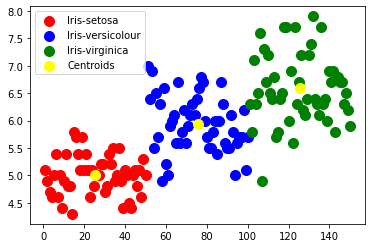

In [42]:
x = df.iloc[:, [0, 1, 2, 3]].values
plt.scatter(x[labels == 0, 0], x[labels == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[labels == 1, 0], x[labels == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[labels == 2, 0], x[labels == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()